<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 169.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 164.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 131.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 137.7 MB/s eta 0:00:00


Import pandas module


In [3]:
import pandas as pd


Import matplotlib


In [4]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [5]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [7]:
# Task 1: Identify Duplicate Rows
# Count total number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_count}")

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nFirst few duplicate rows:")
print(duplicate_rows.head())

Total number of duplicate rows: 0

First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAs

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
## Write your code here
# Step 1: Identify duplicates based on specific columns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_subset = df[df.duplicated(subset=subset_cols, keep=False)]

print(f"Number of duplicate rows based on {subset_cols}: {duplicate_subset.shape[0]}")

# Step 2: Display first few duplicate subset rows
print("\nFirst few duplicates based on selected columns:")
print(duplicate_subset[subset_cols + ['ResponseId']].head())

# Step 3: Analyze which other columns have identical values in these duplicates
# Compare values across rows grouped by the subset columns
grouped = duplicate_subset.groupby(subset_cols)

# Identify columns that frequently have the same values across duplicate groups
identical_columns = []

for col in df.columns:
    if col in subset_cols:
        continue
    if grouped[col].nunique().max() == 1:
        identical_columns.append(col)

print("\nColumns that frequently have identical values across these duplicate groups:")
print(identical_columns)


Number of duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork']: 65270

First few duplicates based on selected columns:
                       MainBranch           Employment RemoteWork  ResponseId
0  I am a developer by profession  Employed, full-time     Remote           1
1  I am a developer by profession  Employed, full-time     Remote           2
2  I am a developer by profession  Employed, full-time     Remote           3
3           I am learning to code   Student, full-time        NaN           4
4  I am a developer by profession   Student, full-time        NaN           5

Columns that frequently have identical values across these duplicate groups:
['Check']


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [10]:
# Check if there are any exact duplicate rows
duplicate_count = df.duplicated(keep=False).sum()
print(f"Total exact duplicate rows: {duplicate_count}")


Total exact duplicate rows: 0


Duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork']: 65270


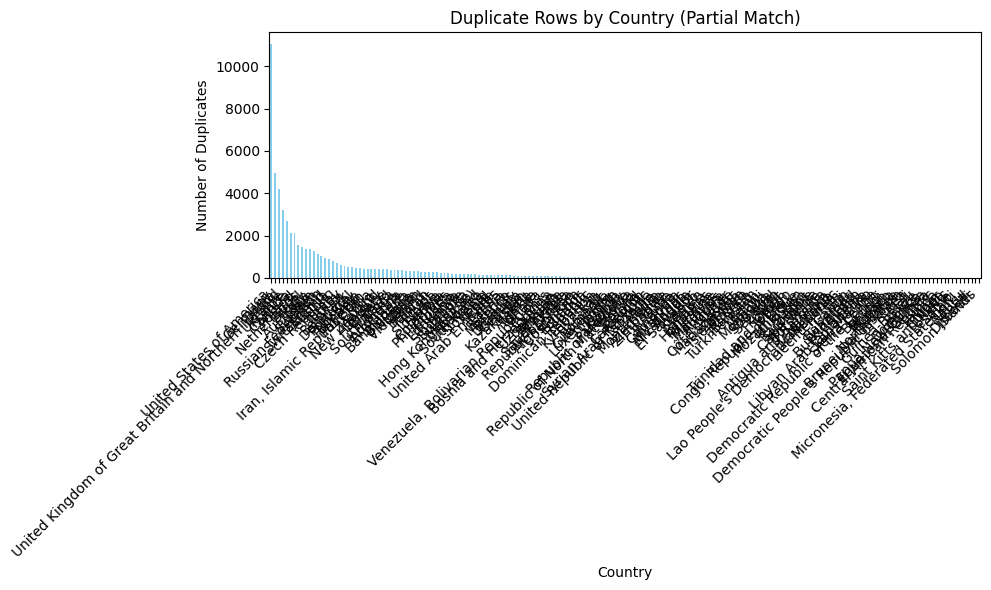

In [11]:
# Define subset of columns to check for duplicates
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']

# Find partial duplicates
partial_duplicates = df[df.duplicated(subset=subset_cols, keep=False)]

# Confirm count
print(f"Duplicate rows based on {subset_cols}: {len(partial_duplicates)}")

# Now visualize by Country
if not partial_duplicates.empty:
    country_counts = partial_duplicates['Country'].value_counts()

    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    country_counts.plot(kind='bar', color='skyblue')
    plt.title("Duplicate Rows by Country (Partial Match)")
    plt.xlabel("Country")
    plt.ylabel("Number of Duplicates")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No partial duplicates found based on selected columns.")


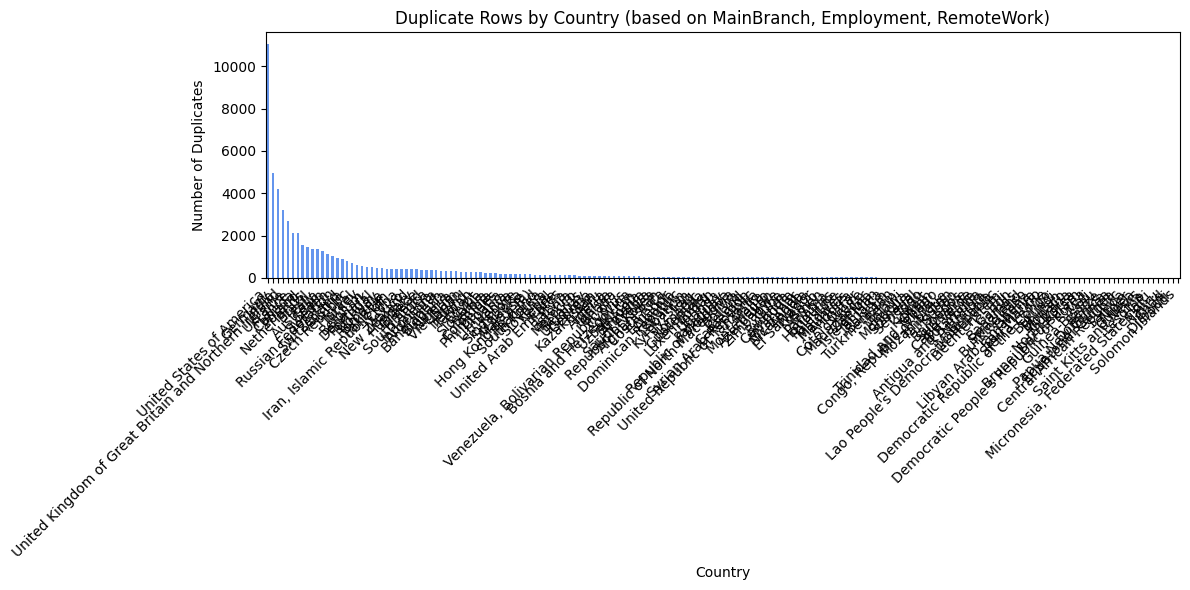

In [12]:
import matplotlib.pyplot as plt

# Get country-wise counts of partial duplicates
country_counts = partial_duplicates['Country'].value_counts()

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='cornflowerblue')
plt.title("Duplicate Rows by Country (based on MainBranch, Employment, RemoteWork)")
plt.xlabel("Country")
plt.ylabel("Number of Duplicates")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


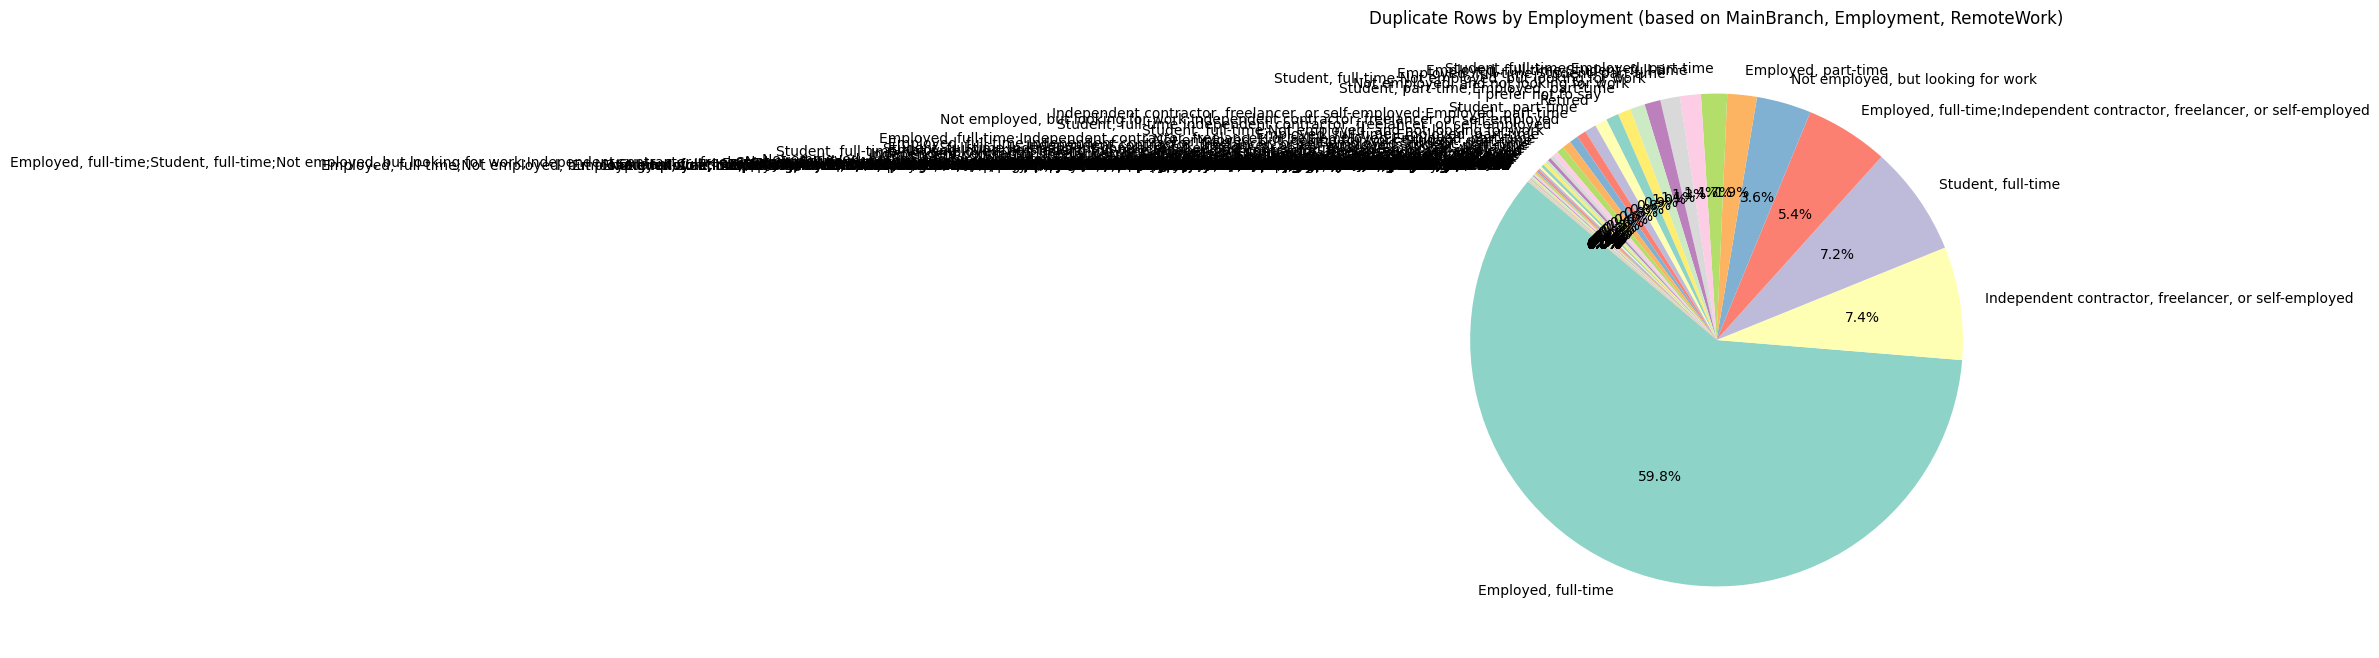

In [13]:
employment_counts = partial_duplicates['Employment'].value_counts()

plt.figure(figsize=(8, 8))
employment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Duplicate Rows by Employment (based on MainBranch, Employment, RemoteWork)")
plt.ylabel('')
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [14]:
## Write your code here
critical_cols = ['MainBranch', 'Employment', 'RemoteWork']
# Create a cleaned version of the DataFrame by dropping partial duplicates
df_cleaned = df.drop_duplicates(subset=critical_cols, keep='first')

# Display the new shape
print(f"Original dataset rows: {df.shape[0]}")
print(f"Cleaned dataset rows: {df_cleaned.shape[0]}")
print(f"Duplicates removed: {df.shape[0] - df_cleaned.shape[0]}")
# Check again for duplicates in cleaned data
remaining_duplicates = df_cleaned.duplicated(subset=critical_cols).sum()
print(f"Remaining duplicates: {remaining_duplicates}")


Original dataset rows: 65437
Cleaned dataset rows: 561
Duplicates removed: 64876
Remaining duplicates: 0


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
